# **Task:** Automatic License Plate Recognition System 

As It Was Noted In The Task. I'm Starting To Deep Dive In The **OpenCV**. As It was mentioned in the https://www.geeksforgeeks.org/opencv-overview/ it is used to higher the contrast and adjust the sharpness of the image, which is prefered for license plate recognition system. Also as I understood, **OpenCV** can be used for edge detection and contour finding, which can be usefull for this task.


After Reading https://medium.com/@zlodeibaal/guide-for-license-plate-recognition-in-2022-e583dc5a7adb| I Understood the steps. Where to Start? How To Start? How The **LPR** Works.

As it was mentioned in the Medium Link. There are 5 steps:

**1.** Vehicle area search

**2.** Number area search

**3.** Plate orientation recognition

**4.** Character Position Estimation

**5.** Text recognition (3–4 algorithm options)


After some research I opened the OpenCV Documentary, read a little and started to install it.

After installation and path changings, I installed it.

In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import imutils
import pytesseract
import easyocr


In [2]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [3]:
cv.__version__ # checking if it was installed correctly

'4.11.0'

After reading some documentary, I tried reading the images which were given by the link.

In [4]:
img1 = cv.imread("car0.jpg")
img1 #as we can see its the arrayed pixels of the image that we have

array([[[100,  75,  25],
        [159, 130,  73],
        [158, 127,  52],
        ...,
        [ 41,  39,  38],
        [ 36,  34,  33],
        [ 40,  38,  37]],

       [[101,  79,  31],
        [146, 121,  65],
        [151, 119,  46],
        ...,
        [ 32,  33,  31],
        [ 42,  43,  41],
        [ 27,  28,  26]],

       [[104,  87,  44],
        [139, 117,  65],
        [146, 116,  43],
        ...,
        [ 33,  37,  32],
        [ 36,  40,  35],
        [ 26,  30,  25]],

       ...,

       [[ 41,  49,  72],
        [ 42,  50,  73],
        [ 43,  51,  74],
        ...,
        [ 48,  67, 104],
        [ 48,  68, 103],
        [ 48,  67, 104]],

       [[ 44,  52,  75],
        [ 45,  53,  76],
        [ 44,  52,  75],
        ...,
        [ 47,  66, 104],
        [ 48,  67, 104],
        [ 48,  67, 105]],

       [[ 44,  52,  75],
        [ 44,  52,  75],
        [ 44,  52,  75],
        ...,
        [ 45,  64, 102],
        [ 46,  65, 103],
        [ 47,  66, 104]]

After some research I found out that we can show the image in Grayscale, Normal and As Colored Image.

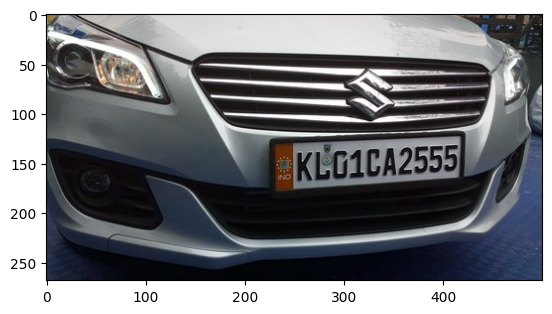

In [5]:
img_color = cv.imread("car0.jpg" , 1) # the 1 stands for normal image

plt.imshow(img_color)

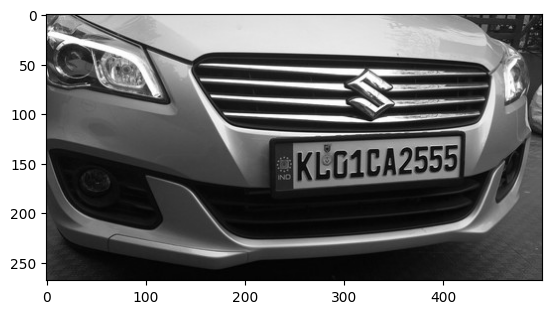

In [6]:
img_contrast = cv.imread("car0.jpg") #Reads The IMG
model = cv.cvtColor(img_contrast , cv.COLOR_BGR2GRAY) #It CHanged The Color Code
gray = cv.cvtColor(model , cv.COLOR_BGR2RGB) #Here It Will Be Gray
plt.imshow(gray)

After some more research I understood I can Crop The Image

The Cropping Mechanism Of OpenCV Looks Like This:
cropped = img[start_row:end_row, start_col:end_col]

In [7]:
print(gray.shape)

(268, 500, 3)


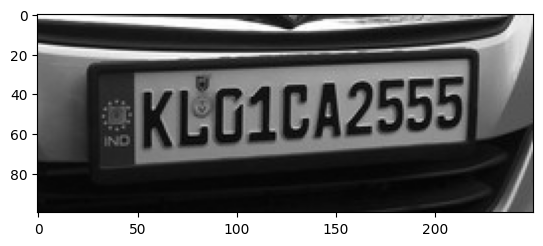

In [8]:
cropped = gray[100 : 200 ,200: 450]
plt.imshow(cropped)

As We Can See We Can Crop The License Plate Manually. But Now Im Wondering. How Can We Use Edge Detection to identify the License Plate?

As It Was Mentioned In https://learnopencv.com/image-filtering-using-convolution-in-opencv/ I Will Use Convolution Kernel For Image Blurring, Image Sharpening and Detecting The Edges

In This Article I Read About How The Pixels are affected by the Kernel 3x3 matrixes. I'll test it to make the image sharper.

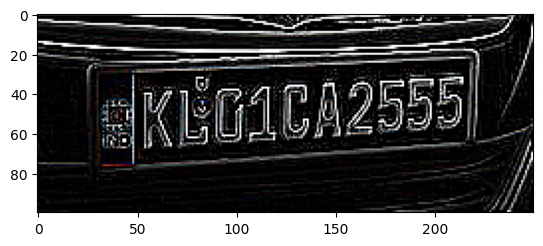

In [9]:
cropped = img_color[100 : 200 ,200: 450]
kernel1 = np.array([[1 , 1 , 1],
                   [1 , -8 , 1],
                    [1 , 1 , 1]])

# I also read about the filter2D(src, ddepth, kernel) method which I'll use here

identity = cv.filter2D(src = cropped , ddepth = -1 , kernel = kernel1)
plt.imshow(identity)

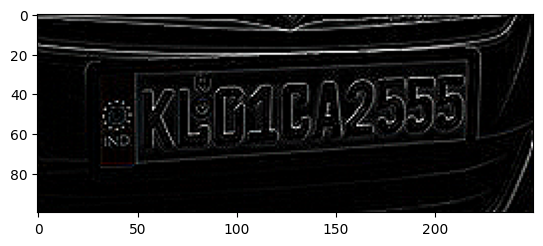

In [10]:
cropped = img_color[100 : 200 ,200: 450]
kernel1 = np.array([[0 , -1 , 0],
                   [-1 , 4, -1],
                   [0 , -1 , 0]])

# As I Understood, There Are Some Different Types Of Types Of kernel Matrixes, and it works additioning this kernel 3x3 matrix to the actual image pixels.
# Thas how the image sharpeness and gets blured.

identity = cv.filter2D(src = cropped , ddepth = -1 , kernel = kernel1)
plt.imshow(identity)

As We Can Notice The Sharpness, and the brightness can be changed with this method, and it makes the edges of the license plate more visible.

There's this article about blobs (https://learnopencv.com/blob-detection-using-opencv-python-c/) which is not practical for here(I Guess). I dont need any blob detection,because I'm analyzing numbers, not circles or any type of circled areas with the same contrast and the same color pallete.

Now I gotta make the edge Detection more valid and better. With blurring and sharpening the image (https://learnopencv.com/edge-detection-using-opencv/)

# **1.** Number area search

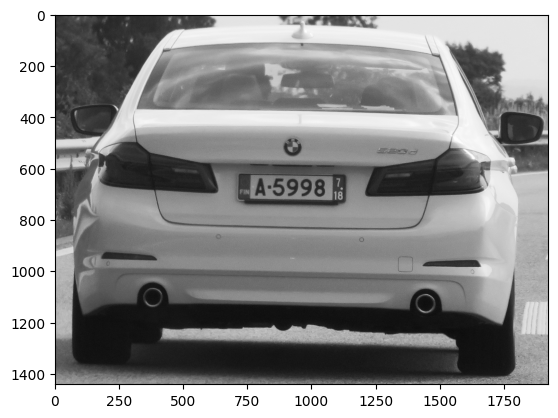

In [1338]:
# Lets detect the edges of the other cars

normal_img = cv.imread("car2.jpg"  , )

model = cv.cvtColor(normal_img , cv.COLOR_BGR2GRAY)
gray1 = cv.cvtColor(model , cv.COLOR_BGR2RGB)

plt.imshow(gray1)

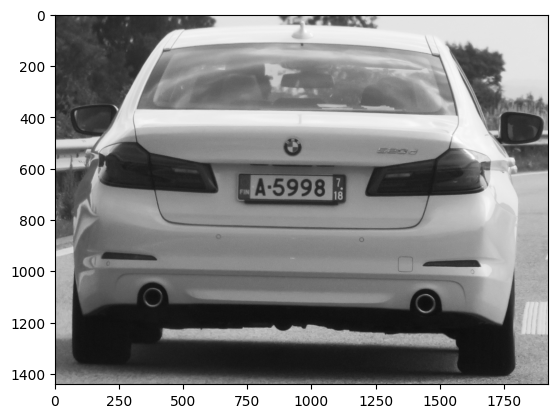

In [1339]:
#Now Lets Blur The Image

img_blur = cv.GaussianBlur(gray1 , (3 , 3) , sigmaX = 1 , sigmaY = 1 ) #the first atribute is the image, the second atribute is the kernel matrix size, which is 3x3, the sigmaX and SigmaY are the intensity of the blur, which are Gradients\

plt.imshow(cv.cvtColor(img_blur , cv.COLOR_BGR2RGB)) # Its a little bit blurred

Now Lets Make The Edges More Visible

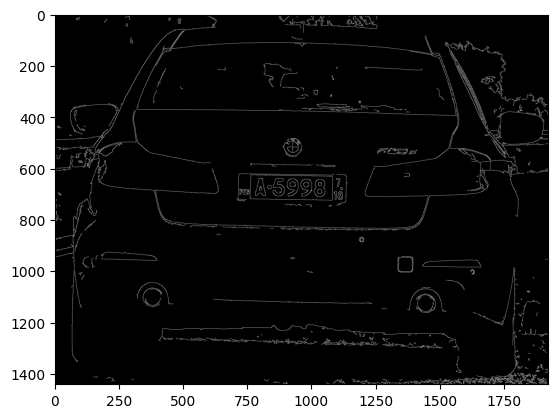

In [1340]:
edges_bpr = cv.Canny(image = img_blur , threshold1 = 60, threshold2 = 150) 
edges = cv.cvtColor(edges_bpr , cv.COLOR_BGR2RGB)


plt.imshow(edges)

I Tried To Use Other Type Of Blurring But The 1st one was better. The Edges are more visible.

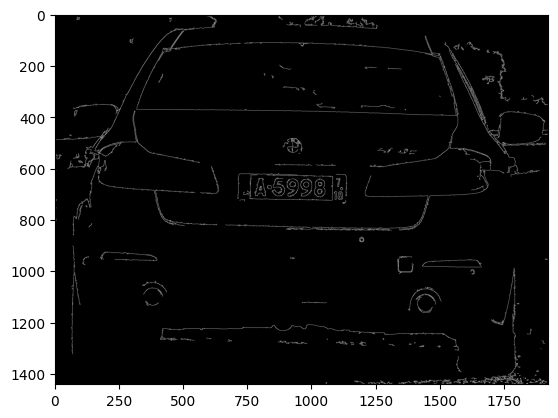

In [1341]:
img_blur1 = cv.bilateralFilter(gray1 , 17 , 15 , 15)

edged1 = cv.Canny(img_blur1 , 100 , 300)

plt.imshow(cv.cvtColor(edged1 , cv.COLOR_BGR2RGB))

I Tried Different Types Of Edge Detection Above. But The Only One That Kinda Worked Was Canny. The Sobel Didnt Work as expected. Ill present The Sobel Below.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-412.0..504.0].


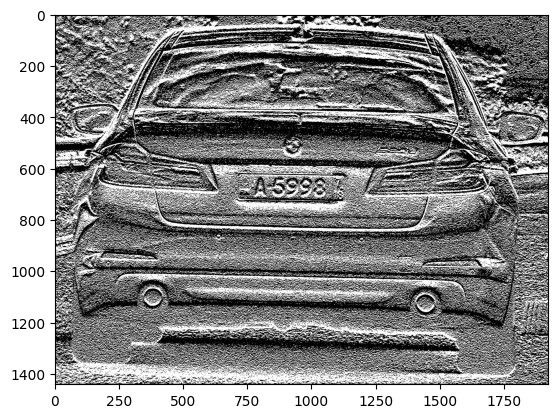

In [1342]:
img_blur1 = cv.GaussianBlur(gray1 , (3 , 3) , sigmaX = 0 , sigmaY = 0 ) 

sobelx = cv.Sobel(src = img_blur1 , ddepth = cv.CV_64F , dx = 1 , dy = 0 , ksize = 3)
sobely = cv.Sobel(src = img_blur1 , ddepth = cv.CV_64F , dx = 0 , dy = 1 , ksize = 3) # I Tried changing the numbers a lot, but it didnt work in any ways
sobelxy = cv.Sobel(src = img_blur1 , ddepth = cv.CV_64F, dx = 1 , dy = 1 , ksize = 3)



plt.imshow(sobely)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-365.0..357.0].


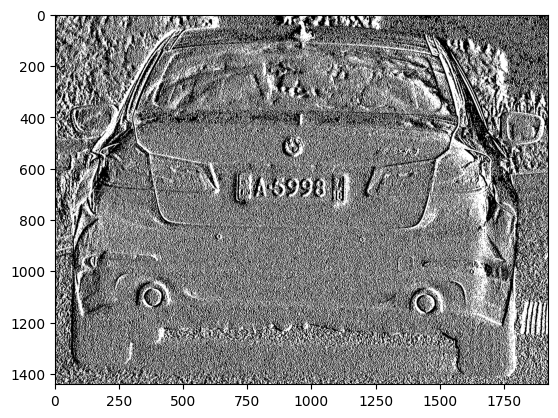

In [1343]:
plt.imshow(sobelx)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-68.0..95.0].


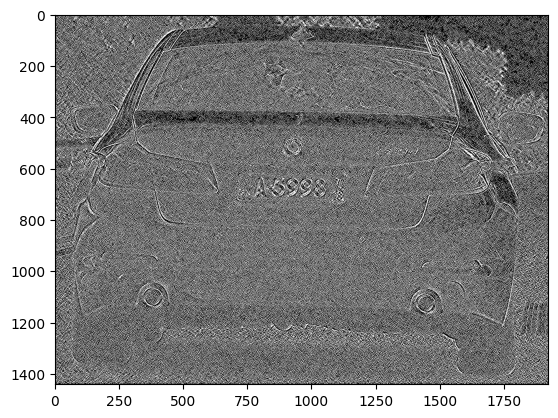

In [1344]:
plt.imshow(sobelxy)


As we can see the first "Rendered" Picture is much better than the other one, so I'll use it to do the countour detection:)

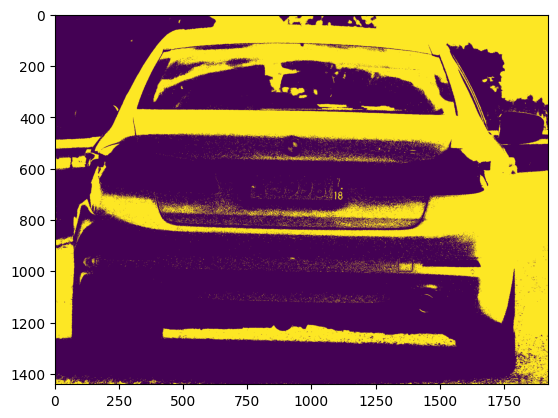

In [1345]:
gray1 = cv.cvtColor(gray1 , cv.COLOR_BGR2GRAY)
ret , thresh = cv.threshold(gray1 , 150 , 255 , cv.THRESH_BINARY) #The Numbers higher 150 will become white (255) and the pixels above its value will become 0

plt.imshow(thresh)

This Image is not supposed to look that way, so I'll try to experiment it a little

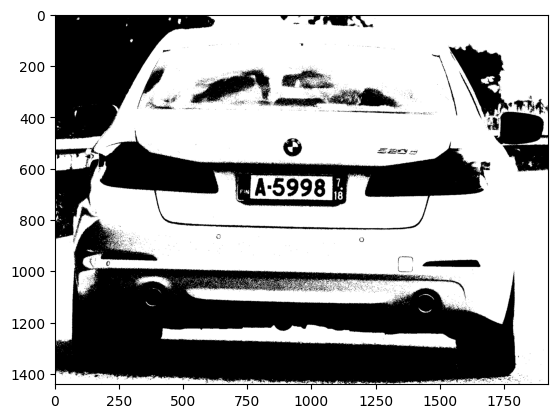

In [1346]:
ret , thresh = cv.threshold(gray1 , 110 , 260 , cv.THRESH_BINARY)

plt.imshow(cv.cvtColor(thresh , cv.COLOR_BGR2RGB))

Looks SO MUCH better than before...

Ill test to detect the contours of the car and license plate with the Canny(), again...

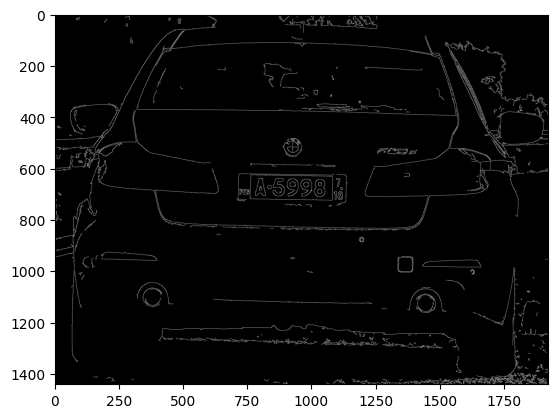

In [1347]:
edges_bp1 = cv.Canny(image = thresh , threshold1 = 20, threshold2 = 200)
edges1 = cv.cvtColor(edges_bpr , cv.COLOR_BGR2RGB)

plt.imshow(edges1)

The Threshold Works Better..

### The Start Of The Task **2**

As I Read In https://cyberworrier2000.medium.com/license-plate-recognition-using-opencv-python-e03dd591f083 I need another library called **imutils**, and I Installed it and Imported at the top of the file

At First Lets Try To Make The Image More Readable

I'll Try To Make It More Undertstandable For The Computer. The License Plate Shall be Clearly Bordered From The Car

I Tried Using The Canny() Method, But It Didnt Work Out That Well, So i Used Threshold To Make The Edges More Visible, And It Worked Pretty Well (For The First , third and fourth Cases)

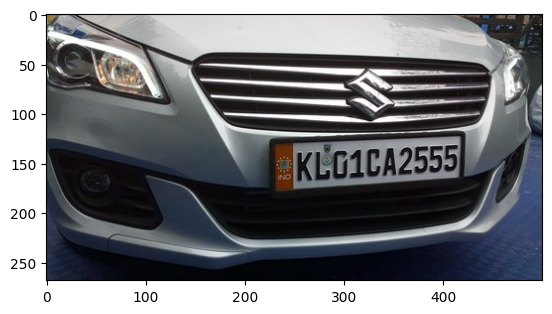

In [1348]:
img = cv.imread("car0.jpg")

plt.imshow(img)


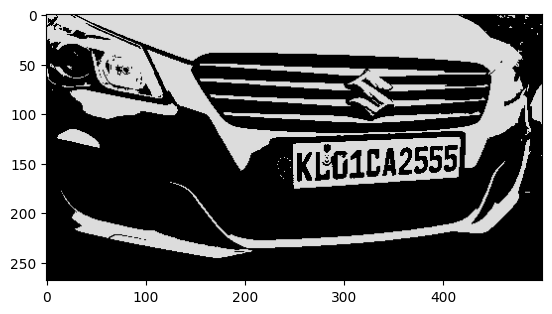

In [1367]:
gray = cv.cvtColor(img , cv.COLOR_BGR2GRAY)
gray = cv.bilateralFilter(gray, 10 , 15 , 15)
ret , edged = cv.threshold(gray , 100 , 220, cv.THRESH_BINARY) # I Experienced A Lot, And Found Out It Was The Perfect For This Cases
# edged = identity = cv.filter2D(src = gray , ddepth = -1 , kernel = kernel1) # I Tried This Method It Worked Horrible
# edged = cv.Canny(gray , 120, 300) 
#At First I Was Doing It With Canny() And It was horrible. Ill Show It Bellow
plt.imshow(cv.cvtColor(edged , cv.COLOR_BGR2RGB))

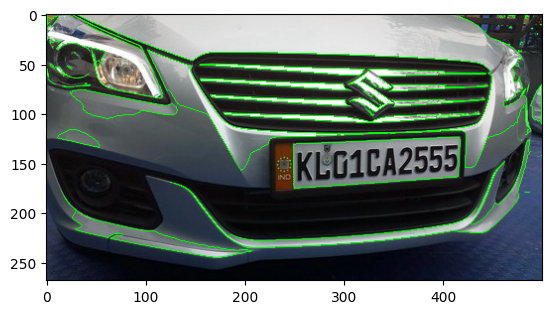

In [1368]:
contours , hierarchy = cv.findContours(edged.copy() , cv.RETR_EXTERNAL , cv.CHAIN_APPROX_SIMPLE) 



asd = cv.drawContours(img.copy() , contours , -1 , (0 , 255 , 0) , 1) 

plt.imshow(asd) 

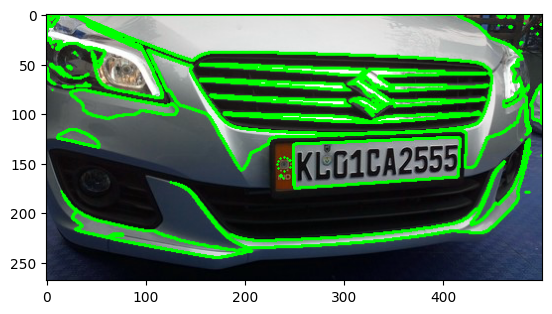

In [1369]:
contours , hierarchy = cv.findContours(edged.copy() , cv.RETR_EXTERNAL , cv.CHAIN_APPROX_NONE ) 



asd = cv.drawContours( img.copy() , contours , -1, (0 , 255 , 0) , 2)

plt.imshow(asd) # The Contours Are Identical, But This One Uses Less Space Than The Previous One, And The Countour Will Be Compressed

As I Understand The Contours Will Return A NumPY Array

In [1370]:
contours

(array([[[ 17, 182]],
 
        [[ 18, 183]],
 
        [[ 18, 184]],
 
        [[ 19, 185]],
 
        [[ 19, 186]],
 
        [[ 20, 187]],
 
        [[ 21, 188]],
 
        [[ 22, 189]],
 
        [[ 22, 190]],
 
        [[ 23, 191]],
 
        [[ 24, 192]],
 
        [[ 25, 193]],
 
        [[ 26, 194]],
 
        [[ 27, 195]],
 
        [[ 28, 196]],
 
        [[ 29, 197]],
 
        [[ 30, 198]],
 
        [[ 29, 199]],
 
        [[ 29, 200]],
 
        [[ 28, 201]],
 
        [[ 27, 202]],
 
        [[ 27, 203]],
 
        [[ 26, 204]],
 
        [[ 26, 205]],
 
        [[ 27, 206]],
 
        [[ 28, 207]],
 
        [[ 29, 207]],
 
        [[ 30, 208]],
 
        [[ 31, 209]],
 
        [[ 32, 210]],
 
        [[ 33, 210]],
 
        [[ 34, 211]],
 
        [[ 35, 212]],
 
        [[ 36, 213]],
 
        [[ 35, 214]],
 
        [[ 34, 214]],
 
        [[ 33, 215]],
 
        [[ 32, 215]],
 
        [[ 31, 216]],
 
        [[ 30, 216]],
 
        [[ 29, 216]],
 
        [[ 30, 2

Now Lets Try To Do That Normally

In [1371]:
contours = cv.findContours(edged.copy() , cv.RETR_EXTERNAL , cv.CHAIN_APPROX_SIMPLE)
contours_test = imutils.grab_contours(contours) #It Changes The Array and makes it sortable
contours = sorted(contours_test , key = cv.contourArea , reverse = True)[:10]
contours_test

(array([[[ 17, 182]],
 
        [[ 18, 183]],
 
        [[ 18, 184]],
 
        [[ 19, 185]],
 
        [[ 19, 186]],
 
        [[ 22, 189]],
 
        [[ 22, 190]],
 
        [[ 30, 198]],
 
        [[ 29, 199]],
 
        [[ 29, 200]],
 
        [[ 27, 202]],
 
        [[ 27, 203]],
 
        [[ 26, 204]],
 
        [[ 26, 205]],
 
        [[ 28, 207]],
 
        [[ 29, 207]],
 
        [[ 32, 210]],
 
        [[ 33, 210]],
 
        [[ 36, 213]],
 
        [[ 35, 214]],
 
        [[ 34, 214]],
 
        [[ 33, 215]],
 
        [[ 32, 215]],
 
        [[ 31, 216]],
 
        [[ 29, 216]],
 
        [[ 30, 217]],
 
        [[ 31, 217]],
 
        [[ 32, 218]],
 
        [[ 34, 218]],
 
        [[ 35, 219]],
 
        [[ 38, 219]],
 
        [[ 39, 220]],
 
        [[ 42, 220]],
 
        [[ 43, 221]],
 
        [[ 47, 221]],
 
        [[ 48, 222]],
 
        [[ 51, 222]],
 
        [[ 52, 223]],
 
        [[ 56, 223]],
 
        [[ 57, 224]],
 
        [[ 60, 224]],
 
        [[ 61, 2

Now We Gotta Choose the Contour From TOP 10 BIGGEST CONTOURS (CLOSED CONTOURS)

In [1372]:
for i in contours:
    # epsilion = 0.02*cv.arcLength(i , True)
    approx = cv.approxPolyDP(i , 10 , True ) #Checks the points of the Contour and equals to approx
    if len(approx) == 4:
        position = approx #HERE IS THE LICENSE PLATE
        break


In [1373]:
position #These are the coordinates of the points of the license plate.

array([[[417, 126]],

       [[252, 130]],

       [[250, 175]],

       [[413, 164]]], dtype=int32)

In [1374]:
mask = np.zeros(gray.shape , np.uint8)# uint8 will either make the pixels 0 or 255 and the zeros make a matrix with the shape of gray image
mask # Here is the matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(268, 500), dtype=uint8)

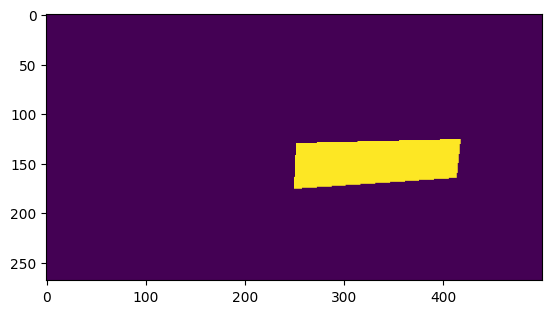

In [1375]:
last = cv.drawContours(mask , [position] , 0 , 255 , -1) # I lost some time figuring out the -1 , and understood that it fills the positioned coordinates with solid white color
plt.imshow(last)

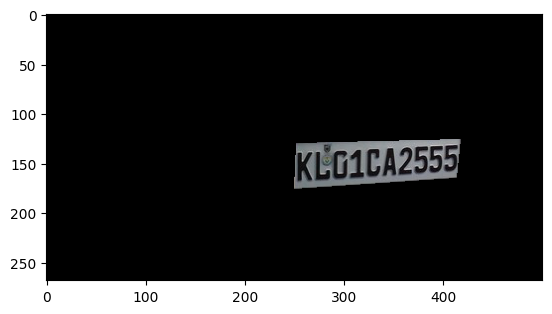

In [1376]:
last = cv.bitwise_and(img , img , mask = mask) # This makes everything black besides the area of the license plate uding bitwise

plt.imshow(last)


Now as We Found The Location of The License Plate. Lets Crop The Image and Remove the Black Part

In [1377]:
position # These Are The Coordinates Of The Contour's Points

array([[[417, 126]],

       [[252, 130]],

       [[250, 175]],

       [[413, 164]]], dtype=int32)

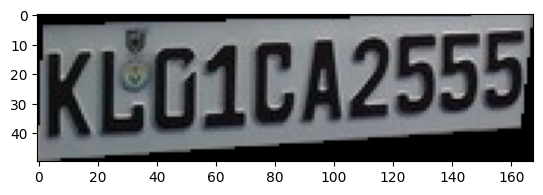

In [1378]:
x , y , w , h = cv.boundingRect(position) #It Takes The x y as the top cordinates nad w h as weight and height
last_img = last[y : y + h , x : x + w] # I Cropped the image to make it smaller
plt.imshow(last_img)

It works pretty well, I think. Now the Number and letter recognition are left

## Text Recognition

At first lets convert it to grayscale.

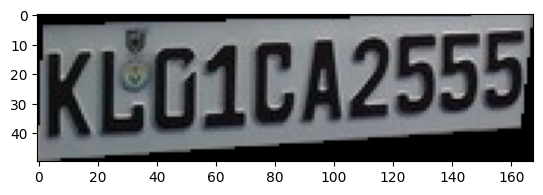

In [1379]:
imgnew = cv.cvtColor(last_img , cv.COLOR_BGR2RGB)

plt.imshow(cv.cvtColor(imgnew , cv.COLOR_BGR2RGB))

Now Lets Use **pytesseract** to read the number plate

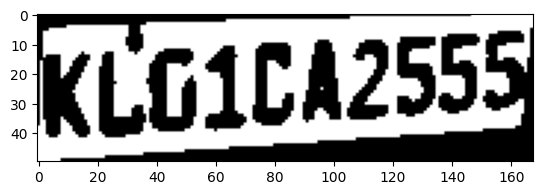

In [1380]:
# latest = cv.fastNlMeansDenoisingColored(imgnew, None, 10, 10, 7, 21) 
latest = cv.cvtColor(imgnew , cv.COLOR_BGR2GRAY)
latest = cv.bilateralFilter(latest.copy() , 9 , 75 , 75)
rt , latest = cv.threshold(latest.copy() , 90, 255 , cv.THRESH_BINARY)
# latest = cv.Canny(latest , 20 , 400)

plt.imshow(cv.cvtColor(latest , cv.COLOR_BGR2RGB))

In [ ]:
text = pytesseract.image_to_string(latest , lang="eng" , config = "--psm 7") #The --psm 7 config is the best because it reads the whole text block , not by each character.

In [1382]:
text

'KLG1CA2555\n'

It Doesnt Work That Well , So Ill try to improve it below

After All of This Lets Make The Final Code

## The Final Code

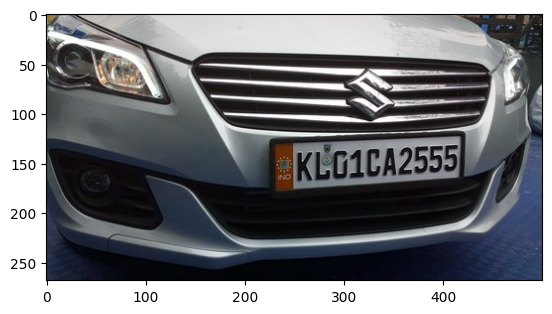

In [1383]:
img = cv.imread("car0.jpg")

plt.imshow(img)

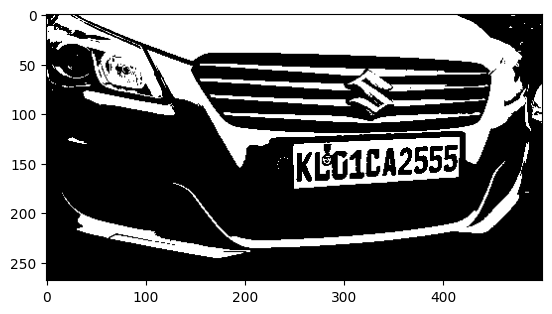

In [1384]:
gray = cv.cvtColor(img , cv.COLOR_BGR2GRAY)
gray = cv.bilateralFilter(gray, 15 , 10 , 10)
ret , edged = cv.threshold(gray , 110 , 300, cv.THRESH_BINARY)

plt.imshow(cv.cvtColor(edged , cv.COLOR_BGR2RGB))

In [1385]:
contours = cv.findContours(edged.copy() , cv.RETR_EXTERNAL , cv.CHAIN_APPROX_SIMPLE)
contours_test = imutils.grab_contours(contours)
contours = sorted(contours_test , key = cv.contourArea , reverse = True)[:10]

In [1386]:
for i in contours:
    approx = cv.approxPolyDP(i , 10 , True )
    if len(approx) == 4:
        position = approx 
        break

In [1387]:
mask = np.zeros(gray.shape , np.uint8)
last = cv.drawContours(mask , [position] , 0 , 255 , -1)
last = cv.bitwise_and(img , img , mask = mask)

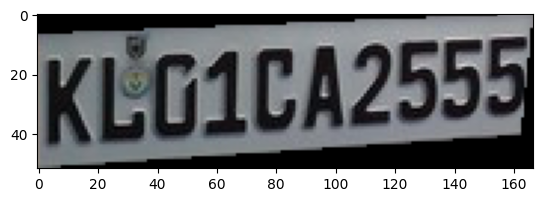

In [1388]:
x , y , w , h = cv.boundingRect(position) 
last_img = last[y : y + h , x : x + w]
plt.imshow(last_img)

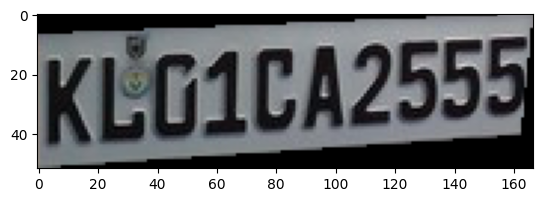

In [1389]:
imgnew = cv.cvtColor(last_img , cv.COLOR_BGR2RGB)

plt.imshow(cv.cvtColor(imgnew , cv.COLOR_BGR2RGB))

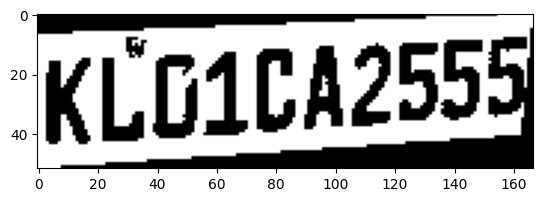

In [1390]:
latest = cv.fastNlMeansDenoisingColored(imgnew, None, 10, 10, 7, 21) 
latest = cv.cvtColor(latest , cv.COLOR_BGR2GRAY)
latest = cv.bilateralFilter(latest.copy() , 20 ,30 , 30)
rt , latest = cv.threshold(latest.copy() , 90, 255 , cv.THRESH_BINARY)
# latest = cv.Canny(latest , 81 , 250)

plt.imshow(cv.cvtColor(latest , cv.COLOR_BGR2RGB))

In [ ]:
text = pytesseract.image_to_string(latest , lang="eng" , config = "--psm 7")

text

'KLO1CA2555\n'

This Image Works Fine As We See. Lets Try The Second One

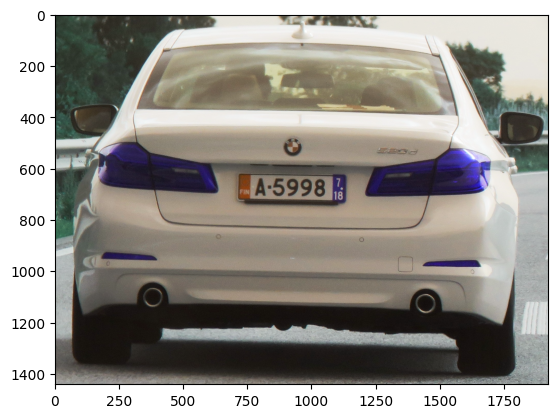

In [1392]:
img = cv.imread("car2.jpg")

plt.imshow(img)

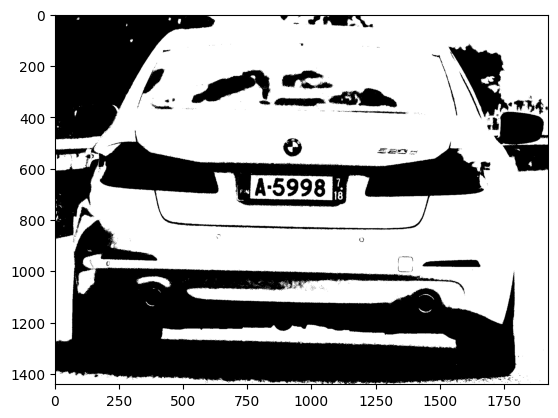

In [1393]:
gray = cv.cvtColor(img , cv.COLOR_BGR2GRAY)
gray = cv.bilateralFilter(gray, 15 , 10 , 10)
ret , edged = cv.threshold(gray , 110 , 300, cv.THRESH_BINARY)

plt.imshow(cv.cvtColor(edged , cv.COLOR_BGR2RGB))

In [1394]:
contours = cv.findContours(edged.copy() , cv.RETR_EXTERNAL , cv.CHAIN_APPROX_SIMPLE)
contours_test = imutils.grab_contours(contours)
contours = sorted(contours_test , key = cv.contourArea , reverse = True)[:10]

In [1395]:
for i in contours:
    approx = cv.approxPolyDP(i , 10 , True )
    if len(approx) == 4:
        position = approx 
        break

In [1396]:
mask = np.zeros(gray.shape , np.uint8)
last = cv.drawContours(mask , [position] , 0 , 255 , -1)
last = cv.bitwise_and(img , img , mask = mask)

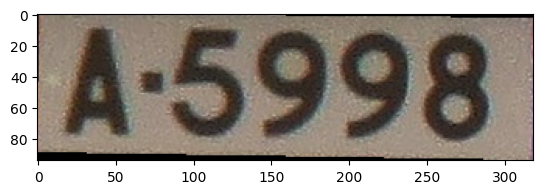

In [1397]:
x , y , w , h = cv.boundingRect(position) 
last_img = last[y : y + h , x : x + w]
plt.imshow(last_img)

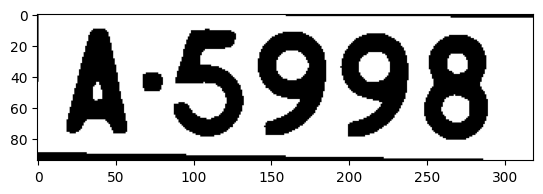

In [1398]:
imgnew = cv.cvtColor(last_img , cv.COLOR_BGR2RGB)
latest = cv.fastNlMeansDenoisingColored(imgnew, None, 10, 10, 7, 21) 
latest = cv.cvtColor(latest , cv.COLOR_BGR2GRAY)
latest = cv.bilateralFilter(latest.copy() , 20 ,30 , 30)
rt , latest = cv.threshold(latest.copy() , 90, 255 , cv.THRESH_BINARY)
# latest = cv.Canny(latest , 81 , 250)

plt.imshow(cv.cvtColor(latest , cv.COLOR_BGR2RGB))

In [1399]:
text = pytesseract.image_to_string(latest , lang="eng" , config = "--psm 7")\

text

'A-5998\n'

This One Works As Well

Lets Try The 3rd one

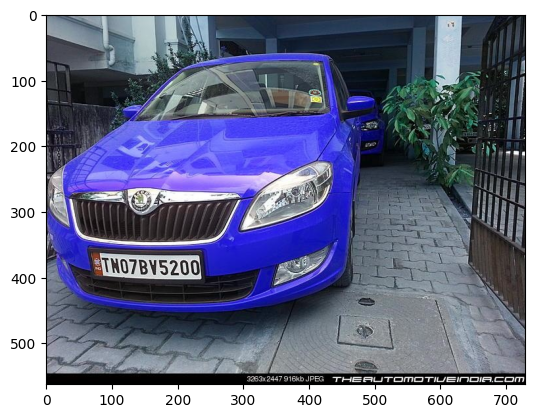

In [1400]:
img = cv.imread("car3.jpg")

plt.imshow(img)

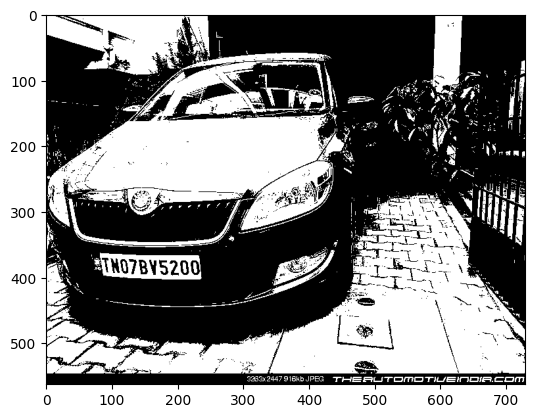

In [1401]:
gray = cv.cvtColor(img , cv.COLOR_BGR2GRAY)
gray = cv.bilateralFilter(gray, 15 , 10 , 10)
ret , edged = cv.threshold(gray , 110 , 300, cv.THRESH_BINARY)

plt.imshow(cv.cvtColor(edged , cv.COLOR_BGR2RGB))

In [1408]:
contours = cv.findContours(edged.copy() , cv.RETR_EXTERNAL , cv.CHAIN_APPROX_SIMPLE)
contours_test = imutils.grab_contours(contours)
contours = sorted(contours_test , key = cv.contourArea , reverse = True)[:10]

In [1403]:
for i in contours:
    approx = cv.approxPolyDP(i , 10 , True )
    if len(approx) == 4:
        position = approx 
        break

In [1404]:
mask = np.zeros(gray.shape , np.uint8)
last = cv.drawContours(mask , [position] , 0 , 255 , -1)
last = cv.bitwise_and(img , img , mask = mask)

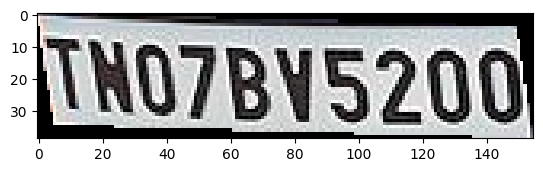

In [1405]:
x , y , w , h = cv.boundingRect(position) 
last_img = last[y : y + h , x : x + w]
plt.imshow(last_img)

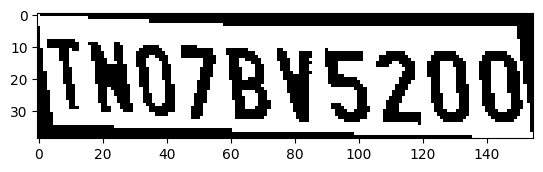

In [1406]:
imgnew = cv.cvtColor(last_img , cv.COLOR_BGR2RGB)
latest = cv.fastNlMeansDenoisingColored(imgnew, None, 10, 10, 7, 21) 
latest = cv.cvtColor(latest , cv.COLOR_BGR2GRAY)
latest = cv.bilateralFilter(latest.copy() , 20 ,30 , 30)
rt , latest = cv.threshold(latest.copy() , 90, 255 , cv.THRESH_BINARY)
# latest = cv.Canny(latest , 81 , 250)

plt.imshow(cv.cvtColor(latest , cv.COLOR_BGR2RGB))

In [1407]:
text = pytesseract.image_to_string(latest , lang="eng" , config = "--psm 7")\

text

'THO7BY5200\n'

And For The 4th, the most problematic Car

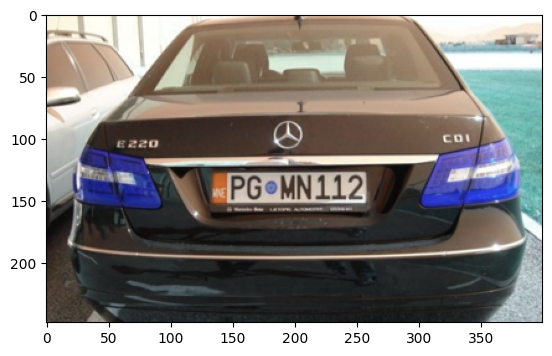

In [1409]:
img = cv.imread("car1.jpg")

plt.imshow(img)

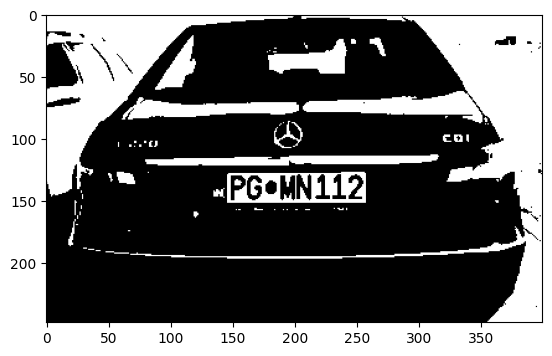

In [1411]:
gray = cv.cvtColor(img , cv.COLOR_BGR2GRAY)
gray = cv.bilateralFilter(gray, 15 , 10 , 10)
ret , edged = cv.threshold(gray , 150 , 300, cv.THRESH_BINARY)

plt.imshow(cv.cvtColor(edged , cv.COLOR_BGR2RGB))

In [1412]:
contours = cv.findContours(edged.copy() , cv.RETR_EXTERNAL , cv.CHAIN_APPROX_SIMPLE)
contours_test = imutils.grab_contours(contours)
contours = sorted(contours_test , key = cv.contourArea , reverse = True)[:10]

In [1413]:
for i in contours:
    approx = cv.approxPolyDP(i , 10 , True )
    if len(approx) == 4:
        position = approx 
        break

In [1414]:
mask = np.zeros(gray.shape , np.uint8)
last = cv.drawContours(mask , [position] , 0 , 255 , -1)
last = cv.bitwise_and(img , img , mask = mask)

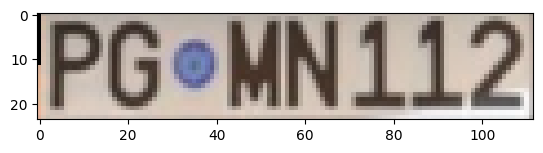

In [1415]:
x , y , w , h = cv.boundingRect(position) 
last_img = last[y : y + h , x : x + w]
plt.imshow(last_img)

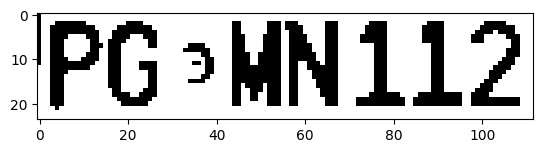

In [1436]:
imgnew = cv.cvtColor(last_img , cv.COLOR_BGR2RGB)
latest = cv.fastNlMeansDenoisingColored(imgnew, None, 10, 10, 7, 21) 
latest = cv.cvtColor(latest , cv.COLOR_BGR2GRAY)
latest = cv.bilateralFilter(latest.copy() , 10 ,15 , 15)
rt , latest = cv.threshold(latest.copy() , 121, 255 , cv.THRESH_BINARY) # I Changed The Threshold Numbers A Little,  Because It Couldnt Read It Normally.

plt.imshow(cv.cvtColor(latest , cv.COLOR_BGR2RGB))

In [1437]:
text = pytesseract.image_to_string(latest , lang="eng" , config = "--psm 7")\

text

'PG°MN112\n'

Well We Can See That It Read The Text Not Quite Well . I tested to make it more visible for the computer, but the "V" has never been recognized correctly. It understands it as "Y" Always.

The Code Isnt Perfect For Every License Plate, Because of The Angles, But It Kinda Works:)

Here Are All The Links And Sources That I Used During This Task:

https://www.geeksforgeeks.org/python-denoising-of-colored-images-using-opencv/

https://ninjakx.github.io/Image_Enhancement/

https://www.geeksforgeeks.org/find-and-draw-contours-using-opencv-python/

https://www.naturefocused.com/articles/photography-image-processing-kernel.html

https://docs.opencv.org/4.x/index.html

https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0 "Mostly"

https://learnopencv.com/getting-started-with-opencv/ "This Whole Tutorial Was My Advisor"

https://medium.com/@draj0718/text-recognition-and-extraction-in-images-93d71a337fc8

https://medium.com/@zlodeibaal/guide-for-license-plate-recognition-in-2022-e583dc5a7adb

There May Not Be The Whole Sources That I Used, But Its The Most Of It...